# Regression with Keras

predicting beak length from all other features using a 3-layer ANN.

In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras import backend as K

In [2]:
df = pd.read_csv('penguins_simple.csv', sep=';')
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


#### Feature Preprocessing

In [3]:
df['Species'] = pd.factorize(df['Species'])[0]
df['Sex'] = pd.factorize(df['Sex'])[0]

In [58]:
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1


In [5]:
sc = MinMaxScaler()

X = sc.fit_transform(df[['Species', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex']])
y = df['Culmen Length (mm)']

In [6]:
X.shape, y.shape

((333, 5), (333,))

#### Modeling

In [7]:
K.clear_session()

m = Sequential([
    Dense(3, activation='relu', input_shape=(5,)),   # hidden layer
    Dense(3, activation='relu'),                    #   another one for the fun of it
    
    Dense(1, activation='linear')                   # output layer
])

In [8]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 18        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


In [14]:
m.compile(optimizer='adam', loss='mean_squared_error', metrics = "MeanSquaredError")

In [15]:
h = m.fit(X, y, batch_size=30, epochs=200, validation_split=0.2)

Epoch 1/200
9/9 [==============================] - 2s 80ms/step - loss: 17.2588 - mean_squared_error: 17.2588 - val_loss: 13.8015 - val_mean_squared_error: 13.8015
Epoch 2/200
9/9 [==============================] - 0s 26ms/step - loss: 15.9047 - mean_squared_error: 15.9047 - val_loss: 13.4996 - val_mean_squared_error: 13.4996
Epoch 3/200
9/9 [==============================] - 0s 21ms/step - loss: 15.3593 - mean_squared_error: 15.3593 - val_loss: 11.8404 - val_mean_squared_error: 11.8404
Epoch 4/200
9/9 [==============================] - 0s 26ms/step - loss: 16.2015 - mean_squared_error: 16.2015 - val_loss: 10.9607 - val_mean_squared_error: 10.9607
Epoch 5/200
9/9 [==============================] - 0s 24ms/step - loss: 14.7906 - mean_squared_error: 14.7906 - val_loss: 11.5790 - val_mean_squared_error: 11.5790
Epoch 6/200
9/9 [==============================] - 0s 26ms/step - loss: 14.6220 - mean_squared_error: 14.6220 - val_loss: 11.4162 - val_mean_squared_error: 11.4162
Epoch 7/200
9/9 

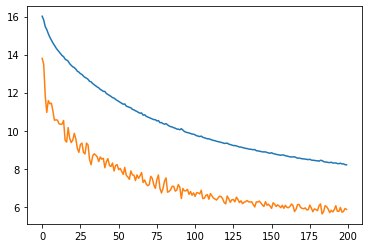

In [16]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

In [17]:
m.evaluate(X, y)

11/11 [==============================] - 0s 4ms/step - loss: 7.7232 - mean_squared_error: 7.7232


[7.723188400268555, 7.723188400268555]